<a href="https://colab.research.google.com/github/HaythemBenMechichi/test/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import html
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DS = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/DS.csv')


In [ ]:
SE = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/SE.csv')

In [ ]:
AI = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/AI.csv')

In [ ]:
MOBILE = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/MOBILE.csv')

In [ ]:
CLOUD = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/CLOUD.csv') 

In [ ]:
TWIN = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/TWIN.csv')

In [ ]:
NIDS = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/NIDS.csv')

In [ ]:
SE.head()

,Name,Education,Experiences,Graduation_Year
0,Amrou Ghribi,Ecole Supérieure Privée d'Ingénierie et de Tec...,Recognize objects passed to a camera mounted o...,0
1,Tarek Hammami,Ecole Supérieure Privée d'Ingénierie et de Tec...,The implementation and development of science ...,2023
2,Ahmed Bannour,Ecole Supérieure Privée d'Ingénierie et de Tec...,Develop a cross platform mobile application th...,2023
3,Med Aymen Ben Ghorbel,Ecole Supérieure Privée d'Ingénierie et de Tec...,Development and maintenance of the company mai...,2018
4,Khalil Bejaoui,Ecole Supérieure Privée d'Ingénierie et de Tec...,Development and migration of the littlebig con...,2020


## NLP Preprocessing

In [ ]:
# Download he necessary NLTK resources
nltk.download(['punkt', 'stopwords', 'wordnet'])
from nltk.corpus import stopwords

# Load spacy
nlp = spacy.load('en_core_web_sm')

def clean_string(text):
    
    # Replace HTML entity codes
    text = html.unescape(text)

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)

    # # Remove puncuation
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = text.translate(translator)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    useless_words = stopwords.words("english")
    text_filtered = [token for token in tokens if not token in useless_words]

    # Remove non-alphabetic characters
    text_filtered = [re.sub(r'[^a-zA-Z.,\-]', '', w) for w in text_filtered]

    # Lemmatization
    lem = WordNetLemmatizer()
    # text_lemmed = [lem.lemmatize(y, pos='v') for y in text_filtered]
    text_lemmed = [lem.lemmatize(y) for y in text_filtered]

    # Re-join text
    final_string = ' '.join(text_filtered)

    return final_string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Create new dataframes with the cleaned and processed text
SE_data = pd.DataFrame(SE['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
DS_data = pd.DataFrame(DS['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
AI_data = pd.DataFrame(AI['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
MOBILE_data = pd.DataFrame(MOBILE['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
CLOUD_data = pd.DataFrame(CLOUD['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
NIDS_data = pd.DataFrame(NIDS['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
TWIN_data = pd.DataFrame(TWIN['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])

In [ ]:
SE_data.sample(10)

,Experiences
45,co organizer collaborated team plan online tal...
110,participate migration monolithic architecture ...
0,recognize objects passed camera mounted raspbe...
117,implemented new website design using wordpress...
7,skills angularjs spring boot java javascript b...
13,web application spring boot angularcontainer a...
100,building recommendation engine buy securities ...
35,development platform intended primarily beginn...
92,development web application institut el amouri...
36,dimzone limited liability company field innova...


## Visulalization

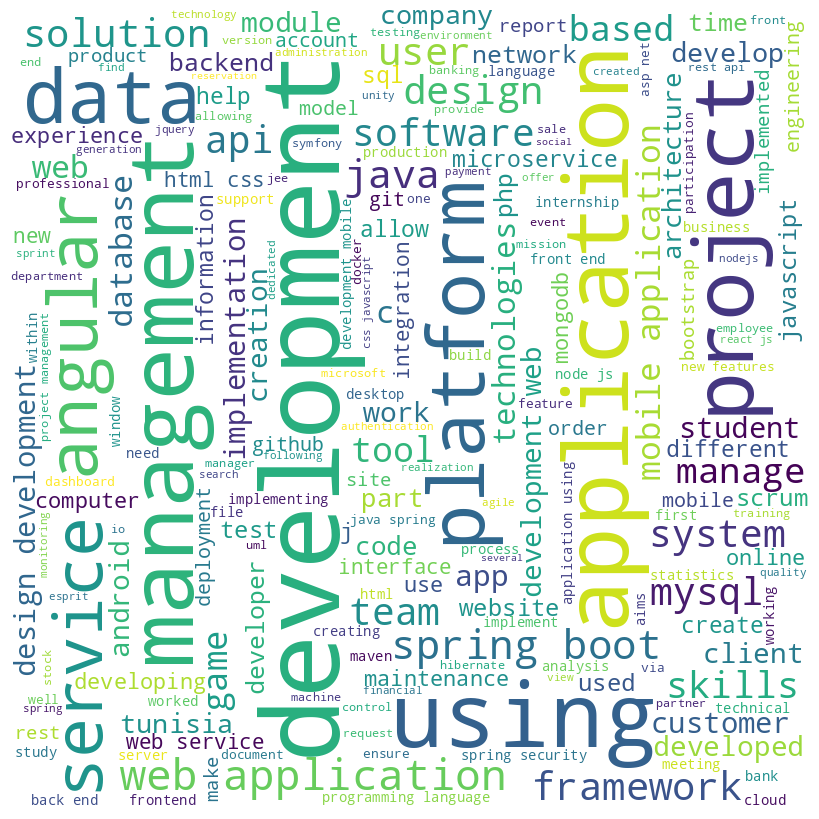

In [ ]:
# Concatenate all the cleaned text into a single string
text = ' '.join(SE_data['Experiences'].tolist())

# Create the wordcloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(text)

# Display the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n):
    """
    Plots top n grams from text
    """
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:30]

    top_n_bigrams=_get_top_ngram(text,n)[:30]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,7))
    if n==2 :
      plt.xlabel("Bi-gram Frequency")
      plt.ylabel("Top 30 bi-grams")
    elif n==3 :
      plt.xlabel("Tri-gram Frequency")
      plt.ylabel("Top 30 Tri-grams")
    sns.barplot(x=y,y=x)

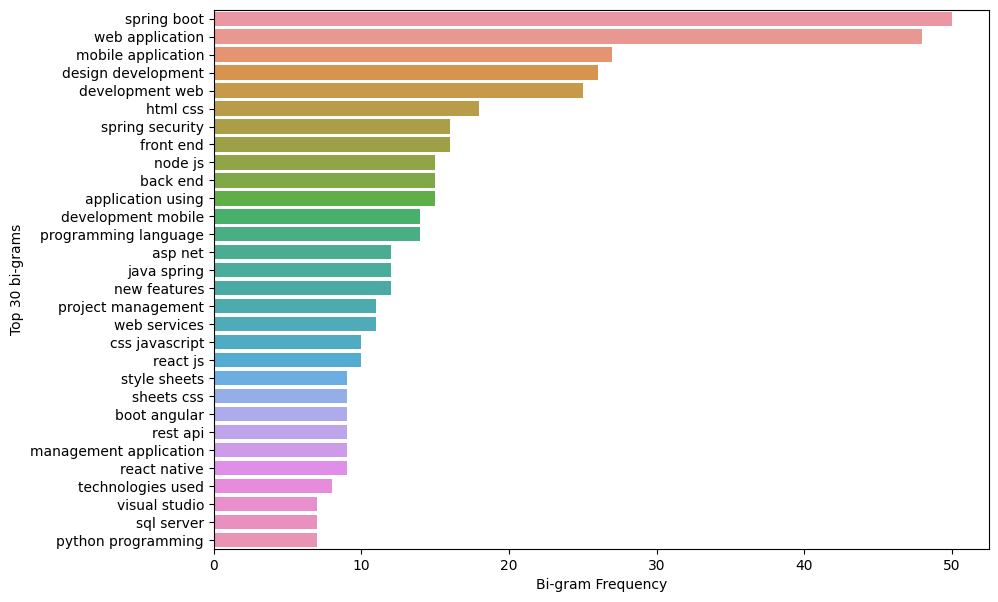

In [ ]:
plot_top_ngrams_barchart(SE_data['Experiences'],2)

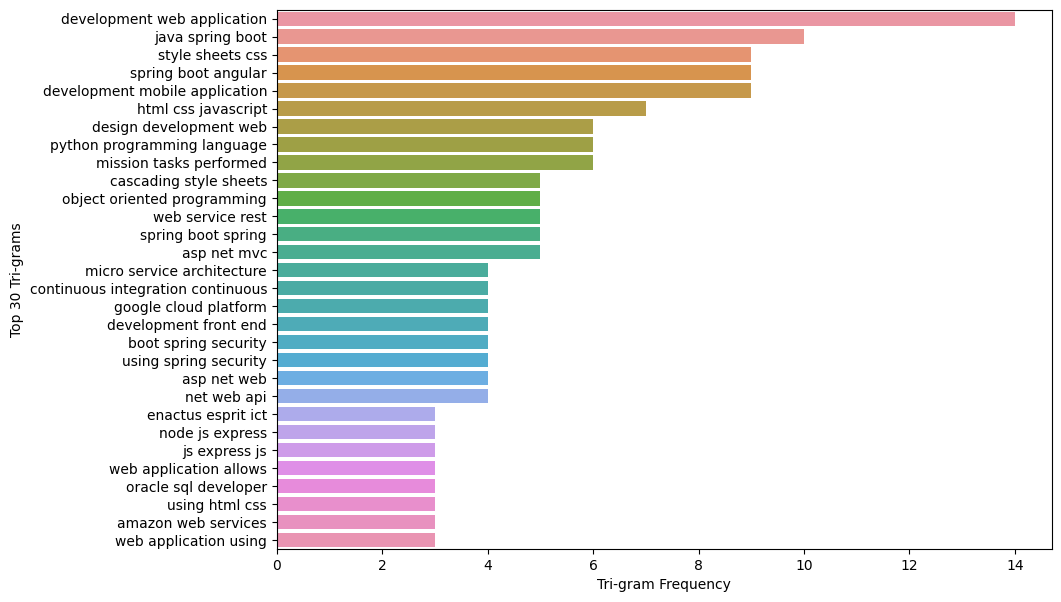

In [ ]:
plot_top_ngrams_barchart(SE_data['Experiences'],3)

## Extracting Keywords using KeyBERT

---



<img src="https://drive.google.com/uc?id=1Jxo9Wj-Y3i_dOA4k38A_Zs04IqTiyOep" width="80%">


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install keybert
!pip install keybert[flair]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.8 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=71e973b651f4a406700f9cb3b46bfdff49c9cf0d7e6c2b238404a261ae30764a
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=798f4eeb84052c15f31a1972ae2788d7ec8934aaad298

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT()

# Define a function to extract keywords for each row
def extract_keywords(doc):
    """
    This function extracts the top 10 keywords from a given document using KeyBERT
    """
    keyphrases = kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 2), top_n=10)
    keywords = list(set([keyword for keyword, score in keyphrases]))
    # return ", ".join(keywords)
    return keywords

In [ ]:
SE_skills = pd.DataFrame(SE_data['Experiences'].apply(extract_keywords).tolist(), columns=['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6', 'skill_7', 'skill_8', 'skill_9', 'skill_10'])

In [ ]:
SE_skills.sample(5)

,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,skill_7,skill_8,skill_9,skill_10
98,ontology,devices descriptions,smart home,uses ontology,development ontology,ontology model,devices smart,ontology annotate,annotate devices,model devices
110,service architecture,availabilitytechnical,infrastructure,ensure availabilitytechnical,wan infrastructure,migration monolithic,application delivery,infrastructure global,availabilitytechnical environment,migration
53,management web,frontend,solution management,development application,developpement frontend,nodejs architecture,application management,frontend management,needs development,backend
42,learning management,learning community,tech solutions,olc,features writ,open learning,mission implementing,onboarding experience,olc open,implementing olc
78,framework spring,spring security,skills microservices,spring batch,mongodb,mysql mongodb,spring framework,mongodb spring,java spring,microservices spring


##Visualizing Extracted Keywords

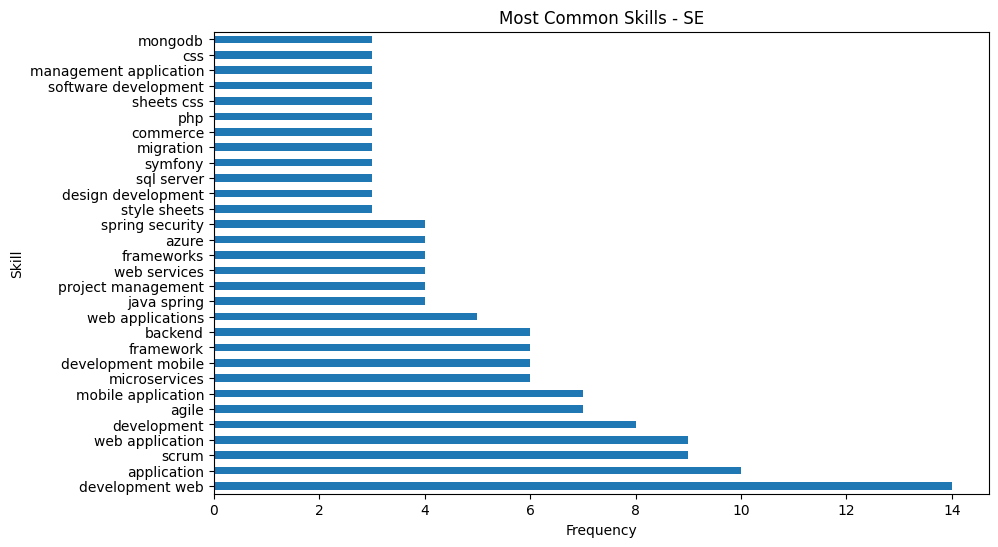

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine all the skills columns into a single column
skills = pd.concat([SE_skills[f"skill_{i}"] for i in range(1, 11)], ignore_index=True)

# Split the skills strings into individual keywords
keywords = [keyword.strip() for skill in skills for keyword in skill.split(",")]

# Count the frequency of each keyword
keyword_counts = pd.Series(keywords).value_counts().sort_values(ascending=False)

# Create a bar chart of the most frequent keywords
plt.figure(figsize=(10,6))
keyword_counts[:30].plot(kind="barh")
plt.title("Most Common Skills - SE")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.show()

# IT tools and technologies database
A comprehensive database of IT skills and technologies required for various occupations. It includes a wide range of skills such as programming languages, software applications, operating systems, and more. In this project, we will be using this database to help clean the extracted keywords by matching them with the skills listed in the database. This will help us ensure that the skills we extracted are relevant.

In [ ]:
# Read the csv file
df = pd.read_csv('/content/drive/MyDrive/Datasets/technologies.csv')

# Convert the csv file into a dataframe
techs = pd.DataFrame(df['Technologies'])

In [ ]:
techs[techs['Technologies'].str.contains('graph', case=False, regex=True)]

,Technologies
154,GraphQL


In [ ]:
from fuzzywuzzy import fuzz
fuzz.ratio('CNN (Convolutional Neural Networks)', 'CNN')

16

In [ ]:
techs.shape

(385, 1)

In [ ]:
techs.sample(10)

,Technologies
347,Objective-C
74,Amazon Translate
0,Azure
185,SciPy
53,PySide
121,C++
318,PHP
186,Oracle
326,ColdFusion
171,PhoneGap


# Fuzzy matching
Fuzzy matching is a technique used to match strings that are not exactly the same but are similar. In our case, we will use it to match the extracted skills with the skills in the IT dataset. We will use it to calculate the similarity score between the two strings and consider a match if the score is above a certain threshold. This will help us identify skills that are spelled or written differently but refer to the same concept.

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the fuzzywuzzy library
from fuzzywuzzy import fuzz

# Define a function to match skills using fuzzy matching and exact matching
def combined_match_skill(skill, skill_list):
    # Loop through each skill in the IT Skills dataset
    for tech in skill_list:
        # Check if the skill is equal to the IT Skill (ignoring case)
        if skill.lower() == tech.lower():
            return tech
        # Calculate the similarity score between the two skills using fuzzy matching
        score = fuzz.ratio(skill.lower(), tech.lower())
        # If the similarity score is above a certain threshold, return the matching skill
        if score >= 70:
            return tech
    # If no match is found, return None
    return None

In [ ]:
# Define a set to store the matched skills
matched_skills = set()

# Loop through each skill in the extracted skills dataframe
for col in SE_skills.columns:
    for skill in SE_skills[col]:
        # Match the skill using the match_skill function
        matched_skill = combined_match_skill(skill, techs['Technologies'])
        # If a match is found, add the matching skill to the matched_skills set
        if matched_skill:
            matched_skills.add(matched_skill)

# Convert the matched_skills set to a list and sort it
SE_tools_list = sorted(list(matched_skills))

# Create the SE_tools dataframe from the list of unique skills
SE_tools = pd.DataFrame({'Tools': SE_tools_list})

In [ ]:
SE_tools.shape

(46, 1)

In [ ]:
SE_tools

,Tools
0,Adobe Experience Manager
1,Agile
2,AngularJS
3,Ansible
4,Azure
5,Azure Cosmos DB
6,Azure Functions
7,Big Data
8,Bootstrap
9,CSS
